In [250]:
!pip install pyreadstat

In [251]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [252]:
df = pd.read_csv('basic.csv')

In [253]:
df = df.drop(['Unnamed: 0'],axis=1)

In [254]:
df

,sex,birth,marrige_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


## 1. 성별에 따른 월급 차이

1. 변수 검토
  - 성별
  - 월급
2. 변수 간 관계 분석
  - 성별 - 월급 평균표
  - 그래프 그리기

In [255]:
# 기초작업.ipynb에서 가공한 basic.csv 데이터를 쓴다.
df

,sex,birth,marrige_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [256]:
# 1. 변수 검토
# 성별의 빈도 구하기(이상치)
df['sex'].value_counts()
# 'sex' 컬럼에 이상치는 없는듯 하다.
# Koweps_Codebook_2019.xlsx 를 참고하여 1 은 남자 2는 여자를 뜻한다.

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [257]:
# 'sex'의 값 1, 2를 남자, 여자로 바꿔준다.
df['sex'] = np.where(df['sex']==1,'man','woman')
df

,sex,birth,marrige_type,religion,income,code_job,code_region
0,woman,1945.0,2.0,1.0,NaN,NaN,1.0
1,man,1948.0,2.0,2.0,NaN,NaN,1.0
2,man,1942.0,3.0,1.0,107.0,762.0,1.0
3,man,1962.0,1.0,1.0,192.0,855.0,1.0
4,woman,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,woman,1967.0,1.0,1.0,NaN,NaN,5.0
14414,woman,1992.0,5.0,1.0,NaN,NaN,5.0
14415,man,1995.0,5.0,1.0,NaN,910.0,5.0
14416,woman,1998.0,5.0,1.0,200.0,246.0,5.0


<AxesSubplot: xlabel='sex', ylabel='count'>

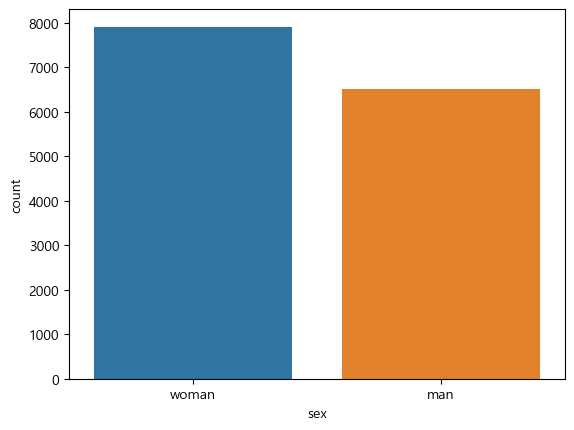

In [258]:
# 한번 시각화 해보자
sns.countplot(data=df,x='sex')

In [259]:
# 잘된거같으니 월급의 이상치를 확인해보자.
df['income'].isna().sum()
# 9884 개나 결측치가 존재한다.

9884

In [260]:
# 'income'의 결측치를 빼고 'sex' 와 'income'의 관계를 데이터화해보자.
sex_income = df.dropna(subset=['income'])\
    .groupby('sex',as_index=False).agg(mean_income=('income','mean'))

In [261]:
# 잘된거 같다. 바로 막대그래프로 그리자.
sex_income

,sex,mean_income
0,man,349.037571
1,woman,186.293096


<AxesSubplot: xlabel='sex', ylabel='mean_income'>

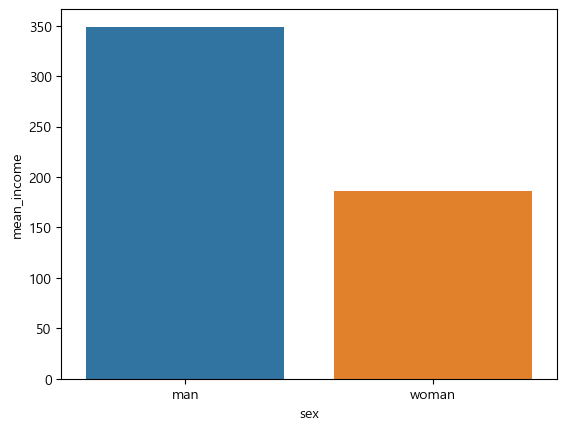

In [262]:
# 잘 그려진다. 다음으로 넘어가자.
sns.barplot(data=sex_income,x='sex',y='mean_income')

## 2. 나이와 월급의 관계
1. 변수 검토
  - 나이
  - 월급
2. 관계 분석
  - 나이에 따른 월급 평균표
  - 그래프 그리기

In [263]:
# 1. 변수검토
# 나이 변수를 검토해보자.
df

,sex,birth,marrige_type,religion,income,code_job,code_region
0,woman,1945.0,2.0,1.0,NaN,NaN,1.0
1,man,1948.0,2.0,2.0,NaN,NaN,1.0
2,man,1942.0,3.0,1.0,107.0,762.0,1.0
3,man,1962.0,1.0,1.0,192.0,855.0,1.0
4,woman,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,woman,1967.0,1.0,1.0,NaN,NaN,5.0
14414,woman,1992.0,5.0,1.0,NaN,NaN,5.0
14415,man,1995.0,5.0,1.0,NaN,910.0,5.0
14416,woman,1998.0,5.0,1.0,200.0,246.0,5.0


In [264]:
# ? 나이변수가 태어난 년도로 되어있다

df.birth

0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth, Length: 14418, dtype: float64

In [265]:
# 결측치도 없다.
df.birth.isna().sum()

0

In [266]:
# series 특성을 이용하여 age 형식으로 바꿔주자
df = df.assign(age= 2019 - df.birth + 1)
df
# 끝에 age 컬럼이 만들어져있다.

,sex,birth,marrige_type,religion,income,code_job,code_region,age
0,woman,1945.0,2.0,1.0,NaN,NaN,1.0,75.0
1,man,1948.0,2.0,2.0,NaN,NaN,1.0,72.0
2,man,1942.0,3.0,1.0,107.0,762.0,1.0,78.0
3,man,1962.0,1.0,1.0,192.0,855.0,1.0,58.0
4,woman,1963.0,1.0,1.0,NaN,NaN,1.0,57.0
...,...,...,...,...,...,...,...,...
14413,woman,1967.0,1.0,1.0,NaN,NaN,5.0,53.0
14414,woman,1992.0,5.0,1.0,NaN,NaN,5.0,28.0
14415,man,1995.0,5.0,1.0,NaN,910.0,5.0,25.0
14416,woman,1998.0,5.0,1.0,200.0,246.0,5.0,22.0


In [267]:
# income에 결측치가 있었으니 제거해주고 'age-income' 데이터프레임을 만들어주자.
age_income = df.dropna(subset=['income'])\
    .groupby('age',as_index=False).agg(mean_income=('income','mean'))

In [268]:
# 잘만들어졌다.
age_income
# 행이 많으니 선그래프로 그려주자.

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471
...,...,...
69,88.0,27.000000
70,89.0,27.000000
71,90.0,27.000000
72,91.0,20.000000


<AxesSubplot: xlabel='age', ylabel='mean_income'>

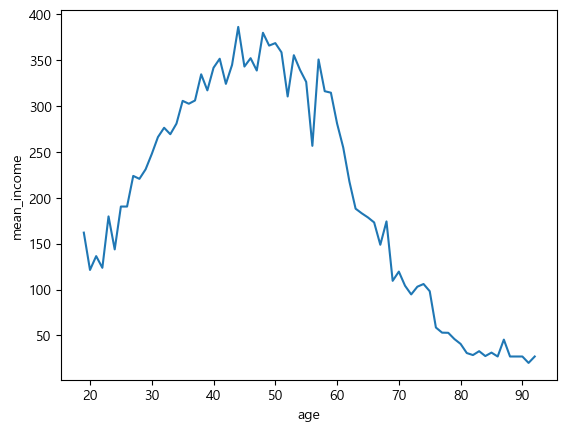

In [269]:
# 잘만들어진다. 다음으로 넘어가자.
sns.lineplot(data=age_income,x='age',y='mean_income')

## 3. 연령대에 따른 월급 차이

1. 변수 검토
    - 연령대
    - 월급
2. 변수 간 관계 분석
    - 연령대별 월급 평균표
    - 그래프


In [270]:
# 연령별이아닌 연령대별이다.
# 약 3개정도로 나누어주자

- 범주
  - 초년층 : ~ 34세
  - 중년층 : 35세 ~ 64세
  - 노년층 : 65세 ~

In [271]:
df = df.assign(ageg=np.where(df['age']< 35, 'young',
                             np.where(df['age']<65, 'middle','old')))

In [272]:
# 맨오른쪽에 ageg 컬럼이 추가되어있다.
df

,sex,birth,marrige_type,religion,income,code_job,code_region,age,ageg
0,woman,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,old
1,man,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,old
2,man,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,old
3,man,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,middle
4,woman,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,middle
...,...,...,...,...,...,...,...,...,...
14413,woman,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,middle
14414,woman,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,young
14415,man,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,young
14416,woman,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,young


In [273]:
# income에 결측치가 있었으니 제거해주고 'ageg-income' 데이터프레임을 만들어주자.
ageg_income = df.dropna(subset=['income'])\
    .groupby('ageg',as_index=False).agg(mean_income=('income','mean'))

In [274]:
# 잘나온다. 행이 별로 없으니 막대그래프로 그려보자.
ageg_income

,ageg,mean_income
0,middle,326.122563
1,old,97.293725
2,young,227.467689


<AxesSubplot: xlabel='ageg', ylabel='mean_income'>

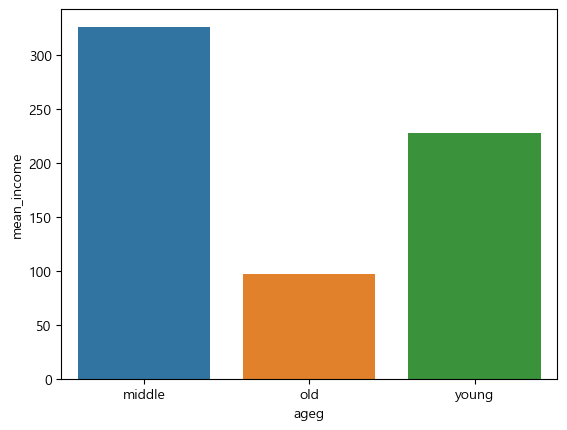

In [275]:
sns.barplot(data=ageg_income,x='ageg',y='mean_income')

<AxesSubplot: xlabel='ageg', ylabel='mean_income'>

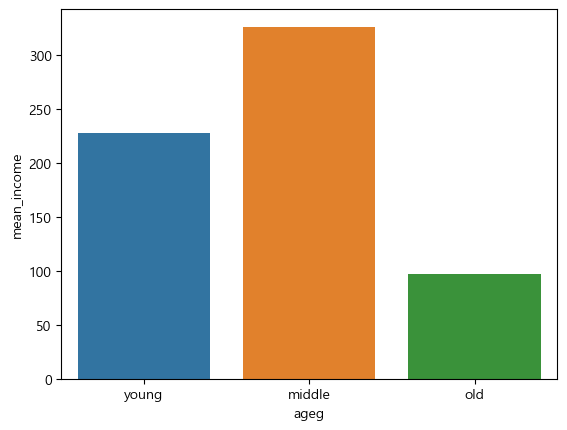

In [276]:
# 심심해서 order 속성으로 순서도 바꾸어주었다.
# 잘된다. 다음으로 넘어가자.
sns.barplot(data=ageg_income,x='ageg',y='mean_income',order=['young','middle','old'])

## 4. 연령대 및 성별의 월급 차이

1. 변수 검토
    - 연령대
    - 성별
    - 월급
2. 변수 간 관계 분석
    - 연령대 및 성별의 월급 평균
    - 그래프
    
- 변수 검토는 이전의 분석으로 완료 되었으므로, 검토 단계 통과

In [277]:
# 앞선 작업으로 연령대, 성별, 월급에 대한 파악이 다 끝났다.
# 바로 관계데이터를 만들어주자.
ageg_sex_income = df.dropna(subset=['income'])\
    .groupby(['ageg','sex'],as_index=False)\
        .agg(mean_income=('income','mean'))

In [278]:
# groupby에 파라미터를 두개를 넣어주었다.
# 잘된다. 그래프로 그려보자.
ageg_sex_income

,ageg,sex,mean_income
0,middle,man,414.120329
1,middle,woman,218.660480
2,old,man,142.332203
3,old,woman,68.028634
4,young,man,248.344578
5,young,woman,210.070281


<AxesSubplot: xlabel='ageg', ylabel='mean_income'>

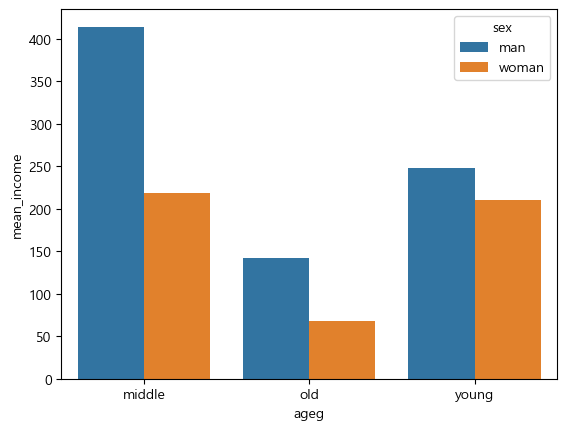

In [279]:
# barplot의 hue 속성으로 'sex' 의 값의 다름을 색으로 표현하였다.
# 잘된다. 다음으로 넘어가자.
sns.barplot(data=ageg_sex_income,x='ageg',y='mean_income',hue='sex')

## 5. 직업별 월급 차이

1. 변수 검토
    - 직업
    - 월급
2. 변수 간 관계 분석
    - 직업별 월급 평균
    - 그래프

In [280]:
# 1. 변수 검토
# 처음보는 직업 변수이다.
df['code_job']
# 이상한 숫자와 여러가지 결측치로 값이 채워져 있다.

0          NaN
1          NaN
2        762.0
3        855.0
4          NaN
         ...  
14413      NaN
14414      NaN
14415    910.0
14416    246.0
14417      NaN
Name: code_job, Length: 14418, dtype: float64

In [281]:
!pip install openpyxl

In [282]:
# Koweps_Codebook_2019.xlsx 에 각 번호에 해당하는 직업명이 쓰여져있다. 적용시키자.
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx')

In [283]:
# Koweps_Codebook_2019.xlsx 파일에 다른 시트가 불려졌다.
list_job

,변수명,설명,내용,범위,모름/무응답,출처 조사설계서
0,h14_g3,성별,1.남 2.여,N(1~2),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
1,h14_g4,태어난 연도,년,N(1900~2014),모름/무응답=9999,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
2,h14_g10,혼인상태,0.비해당(18세 미만)\n1.유배우 2.사별 3.이혼...,N(0~6),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
3,h14_g11,종교,1.있음 2.없음,N(1~2),모름/무응답=9,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
4,p1402_8aq1,일한달의 월 평균 임금,만원,N(1~9998),모름/무응답=9999,(2019년 14차 한국복지패널조사) 조사설계서-가구원용(beta2).xlsx
5,h14_eco9,직종,직종 코드표 참조,N(직종코드 시트참조),모름/무응답=9999,14차 머지데이터_변수명.xlsx\n(2019년 14차 한국복지패널조사) 조사설계서...
6,h14_reg7,7개 권역별 지역구분,1. 서울 2. 수도권(인천/경기) 3. 부산/경남/울산 ...,N(1~7),NaN,(2019년 14차 한국복지패널조사) 조사설계서-가구용(beta2).xlsx


In [284]:
# sheet_name 으로 원하는 시트를 불러오자.
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx',sheet_name='직종코드')

In [285]:
# 잘된다.
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [286]:
# 이제 merge 메서드로 df 데이터파일에 해당 번호별 직업명을 적용시켜주자.
df.merge(list_job)
# ? 이상하다 job에 결측치 부분도 값이 들어가있다.

,sex,birth,marrige_type,religion,income,code_job,code_region,age,ageg,job
0,man,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,old,전기공
1,man,1965.0,1.0,2.0,NaN,762.0,1.0,55.0,middle,전기공
2,man,1970.0,5.0,2.0,NaN,762.0,7.0,50.0,middle,전기공
3,man,1971.0,3.0,2.0,442.0,762.0,5.0,49.0,middle,전기공
4,man,1960.0,1.0,1.0,NaN,762.0,1.0,60.0,middle,전기공
...,...,...,...,...,...,...,...,...,...,...
6873,man,1977.0,5.0,2.0,250.0,620.0,4.0,43.0,middle,임업 관련 종사자
6874,woman,1975.0,1.0,2.0,208.0,282.0,5.0,45.0,middle,학예사∙사서 및 기록물 관리사
6875,woman,1996.0,5.0,1.0,72.0,282.0,3.0,24.0,young,학예사∙사서 및 기록물 관리사
6876,man,1946.0,1.0,1.0,NaN,282.0,6.0,74.0,old,학예사∙사서 및 기록물 관리사


In [287]:
# how='left' 로 입력한 데이터 프레임 기준 왼쪽을 기준으로(df) 각각의 키값에 해당하는 열을 찾아준다.
df = df.merge(list_job,how='left',on='code_job')

In [288]:
# 잘나온다.
# 이제 job의 결측치를 확인해보자.
df

,sex,birth,marrige_type,religion,income,code_job,code_region,age,ageg,job
0,woman,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,old,NaN
1,man,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,old,NaN
2,man,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,old,전기공
3,man,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,middle,금속기계 부품 조립원
4,woman,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,middle,NaN
...,...,...,...,...,...,...,...,...,...,...
14413,woman,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,middle,NaN
14414,woman,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,young,NaN
14415,man,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,young,건설 및 광업 단순 종사자
14416,woman,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,young,보건 의료 관련 종사자


In [289]:
df.job.isna().sum()
# 7540개나 된다.

7540

In [290]:
# job의 결측치를 제거시키고 평균 표를 만들어보자.
job_income = df.dropna(subset=['job','income'])\
    .groupby('job',as_index=False).agg(mean_income=('income','mean'))

In [291]:
# 잘 나온다
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [292]:
# 값들이 너무많으니 상위 10개만 뽑아보자.
job_top10 = job_income.sort_values('mean_income',ascending=0).head(10)
job_top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<AxesSubplot: xlabel='mean_income', ylabel='job'>

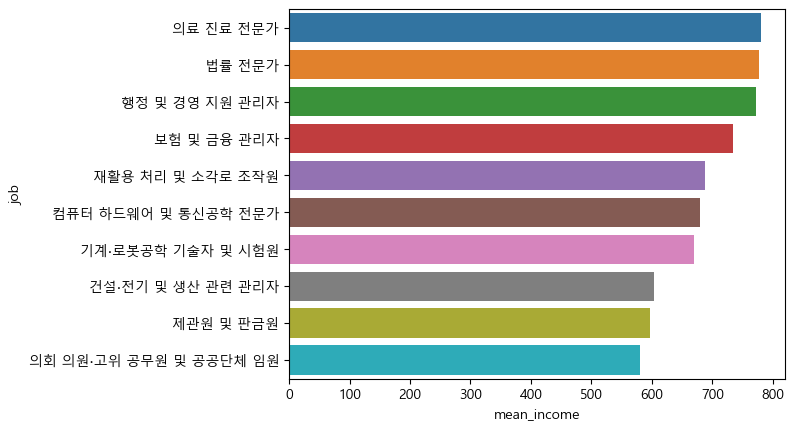

In [293]:
# 잘나온다.
# 막대그래프로 그려보자.
sns.barplot(data=job_top10,x='mean_income',y='job')

In [294]:
# 한글값이라 폰트가 깨진다.
# 한글폰트 적용 : 라이브러리
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})

<AxesSubplot: xlabel='mean_income', ylabel='job'>

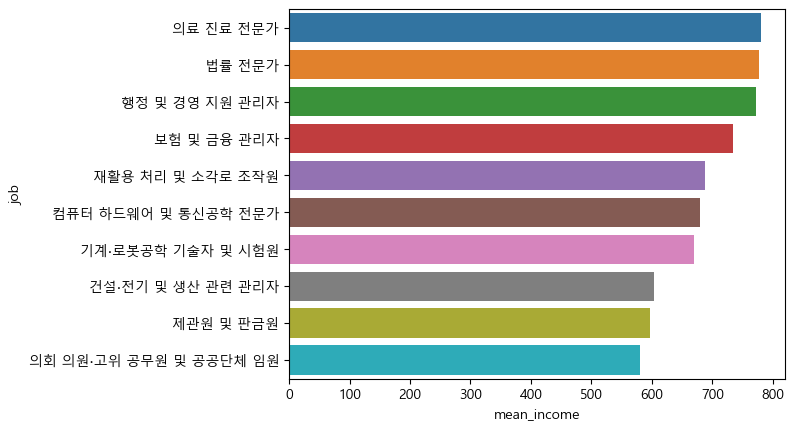

In [295]:
# 한글을 인식하게 할 필요가 있다.
sns.barplot(data=job_top10,y='job',x='mean_income')
# 폰트가 안깨지고 잘된다. 다음으로 넘어가자.

## 6. 성별 직업 빈도
1. 변수 검토
  - 성별
  - 직업
2. 변수간 관계 분석
  - 성별 직업 빈도표 
  - 그래프

- 성별, 직업 데이터 검토 완료되어, 검토단계 통과

In [296]:
# 1.변수검토
# 성별에는 결측치가 없지만, 직업에는 결측치자 있다는 것을 알고있다.
df['job']

0                   NaN
1                   NaN
2                   전기공
3           금속기계 부품 조립원
4                   NaN
              ...      
14413               NaN
14414               NaN
14415    건설 및 광업 단순 종사자
14416      보건 의료 관련 종사자
14417               NaN
Name: job, Length: 14418, dtype: object

In [297]:
# 남성 데이터를 구해보자
job_man = df.dropna(subset=['job']).query('sex=="man"')\
    .groupby('job',as_index=False)\
    .agg(count=('job','count'))
job_man

,job,count
0,가사 및 육아 도우미,1
1,간호사,3
2,감정∙기술영업및중개관련종사자,21
3,건물 관리원 및 검표원,79
4,건설 및 광업 단순 종사자,96
...,...,...
143,화학∙고무 및 플라스틱 제품 생산기 조작원,7
144,화학공학 기술자 및 시험원,6
145,환경∙청소 및 경비 관련 관리자,10
146,환경공학∙가스·에너지 기술자 및 시험원,4


In [298]:
# 위에서 구한 데이터에서 top10을 구해보자.
man_job_top10 = job_man.sort_values('count',ascending=0).head(10)
man_job_top10

,job,count
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [299]:
# 여성 데이터도 만들어 주자.
job_woman = df.dropna(subset=['job']).query('sex=="woman"')\
    .groupby('job',as_index=False).agg(count=('job','count'))
job_woman

,job,count
0,가사 및 육아 도우미,96
1,간호사,70
2,감정∙기술영업및중개관련종사자,6
3,건물 관리원 및 검표원,2
4,건설 및 광업 단순 종사자,8
...,...,...
102,학예사∙사서 및 기록물 관리사,2
103,행정 사무원,54
104,환경∙청소 및 경비 관련 관리자,4
105,환경공학∙가스·에너지 기술자 및 시험원,1


In [300]:
# 여성 데이터으 top10을 만들자.
woman_job_top10 = job_woman.sort_values('count',ascending=0).head(10)
woman_job_top10

,job,count
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


<AxesSubplot: xlabel='count', ylabel='job'>

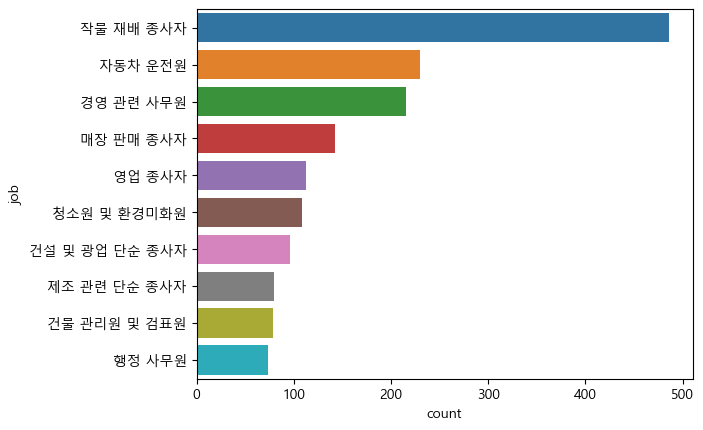

In [301]:
# 남성과 여성 데이터도 그래프를 만들자.
# 남성
sns.barplot(data=man_job_top10,x='count',y='job')

<AxesSubplot: xlabel='count', ylabel='job'>

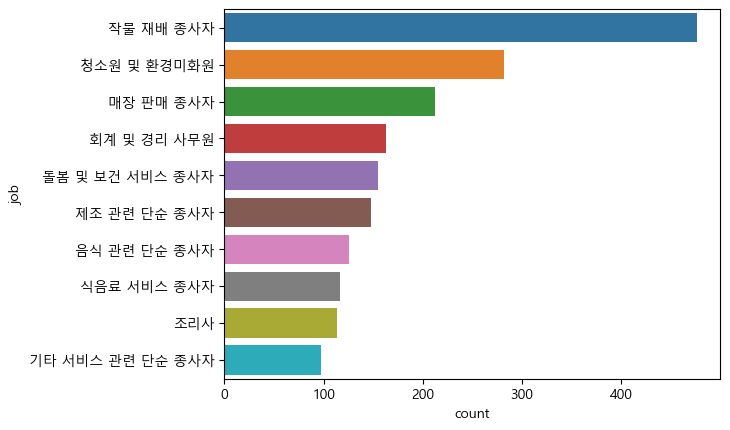

In [302]:
# 여성
sns.barplot(data=woman_job_top10,x='count',y='job')

In [303]:
# 다음으로 넘어가자.

## 7. 종교 유무에 따른 이혼율
1. 변수 검토 전처리
  - 종교
  - 혼인상태
2. 변수 간 관계 분석
  - 종교 유무에 따른 이혼율 표
  - 그래프

In [304]:
# df의 종교 컬럼을 살펴보자.
df['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

In [305]:
# 1과 2로만 표시되어있고 결측치가 없으니 데이터값을 변경시켜주자.
# 1이면 yes, 2면 No로 바꿔주자.
df['religion'] = np.where(df['religion']== 1.0, 'yes','no')

In [306]:
# 성공적으로 변경되었다.
df['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

In [307]:
# 다음은 혼인상태 변수이다.
df['marrige_type'].value_counts()
# 0부터 6까지 있지만, 간단하게 1은 혼인, 3은 이혼 그 외는 etc 처리해준다.

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marrige_type, dtype: int64

In [308]:
df['marrige'] = np.where(df['marrige_type'] == 1.0,"marrige",
                              np.where(df['marrige_type']==3.0,"divorce","etc"))

In [309]:
# 성공적으로 변경되었다.
df['marrige'].value_counts().to_frame()

,marrige
marrige,7190
etc,6539
divorce,689


In [310]:
# 이혼 여부별 빈돌를 구해보자.
count_divorce = df.groupby('marrige',as_index=False).agg(count=('marrige','count'))
count_divorce

,marrige,count
0,divorce,689
1,etc,6539
2,marrige,7190


<AxesSubplot: xlabel='marrige', ylabel='count'>

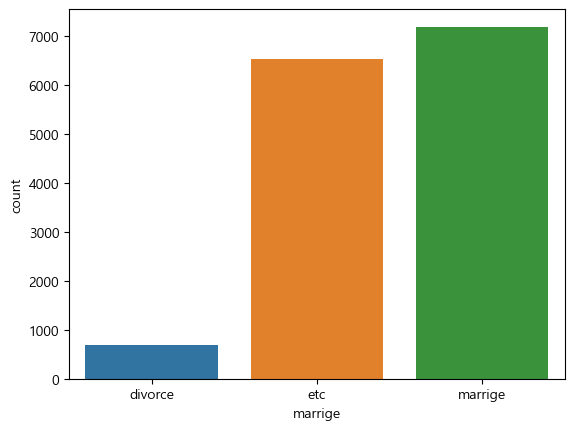

In [311]:
sns.barplot(data=count_divorce,x='marrige',y='count')

In [312]:
# 위의 값중 etc를 제외하고 divorce, marrige만 사용하자.
rel_div = df.query('marrige!="etc"').groupby('religion',as_index=False)\
    ['marrige'].value_counts(normalize=True)
rel_div
# 아래의 표는 각 값의 퍼센테이지를 나타낸 값이다.

,religion,marrige,proportion
0,no,marrige,0.905045
1,no,divorce,0.094955
2,yes,marrige,0.920469
3,yes,divorce,0.079531


In [313]:
# 위의 값에서 이혼부분만 살펴보고 이혼율을 percent 컬럼으로 새로만들어 추가하자.
rel_div = rel_div.query('marrige=="divorce"')\
    .assign(percent=rel_div['proportion']*100).round(1)
rel_div

,religion,marrige,proportion,percent
1,no,divorce,0.1,9.5
3,yes,divorce,0.1,8.0


<AxesSubplot: xlabel='religion', ylabel='percent'>

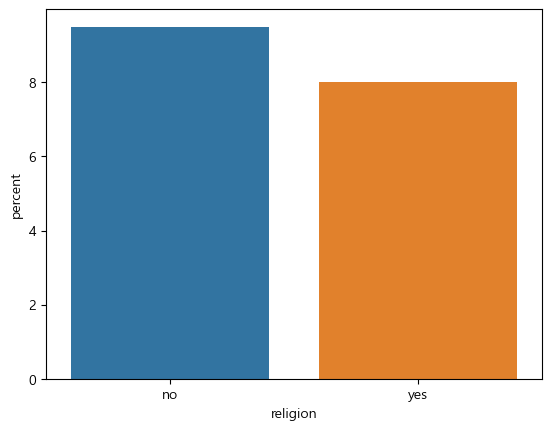

In [314]:
# 위 데이터프레임을 그래프로 만들자.
sns.barplot(data=rel_div,y='percent',x='religion')

In [315]:
# 다른 것도 퍼센테이지로 바꾸어보자.
# 연령대별(ageg)
ageg_div = df.query('marrige!="etc"')\
    .groupby('ageg',as_index=False)['marrige'].value_counts(normalize=True)
ageg_div

,ageg,marrige,proportion
0,middle,marrige,0.896072
1,middle,divorce,0.103928
2,old,marrige,0.931090
3,old,divorce,0.068910
4,young,marrige,0.980469
5,young,divorce,0.019531


In [316]:
ageg_div = ageg_div.query('marrige=="divorce"')\
    .assign(percent=ageg_div['proportion']*100).round(1)
ageg_div

,ageg,marrige,proportion,percent
1,middle,divorce,0.1,10.4
3,old,divorce,0.1,6.9
5,young,divorce,0.0,2.0


<AxesSubplot: xlabel='ageg', ylabel='percent'>

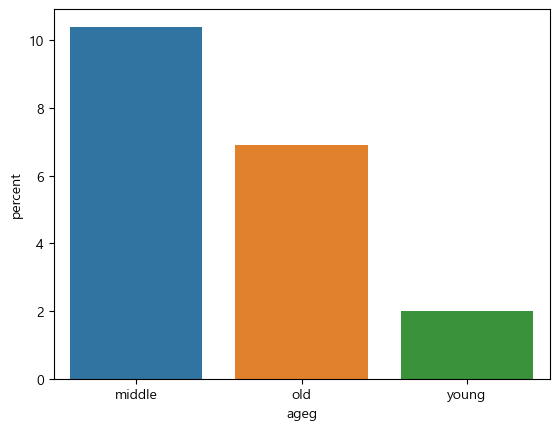

In [317]:
sns.barplot(data=ageg_div,x='ageg',y='percent')

In [318]:
# 이번엔 연령대랑 종교 동시에 나타내 보자.
ageg_rel_div = df.query('marrige!="etc"')\
    .groupby(['ageg','religion'],as_index=False)\
        ['marrige'].value_counts(normalize=True)
ageg_rel_div

,ageg,religion,marrige,proportion
0,middle,no,marrige,0.889463
1,middle,no,divorce,0.110537
2,middle,yes,marrige,0.904313
3,middle,yes,divorce,0.095687
4,old,no,marrige,0.924890
5,old,no,divorce,0.075110
6,old,yes,marrige,0.935949
7,old,yes,divorce,0.064051
8,young,no,marrige,0.976608
9,young,no,divorce,0.023392


In [319]:
ageg_rel_div = ageg_rel_div.query('marrige=="divorce"')\
    .assign(percent=ageg_rel_div['proportion']*100).round(1)
ageg_rel_div

,ageg,religion,marrige,proportion,percent
1,middle,no,divorce,0.1,11.1
3,middle,yes,divorce,0.1,9.6
5,old,no,divorce,0.1,7.5
7,old,yes,divorce,0.1,6.4
9,young,no,divorce,0.0,2.3
11,young,yes,divorce,0.0,1.2


<AxesSubplot: xlabel='ageg', ylabel='percent'>

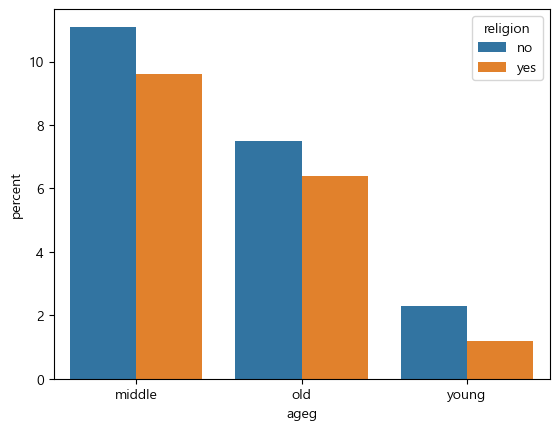

In [320]:
# 연령대와 종교간의 이혼율을 나타낸 ageg_rel_div를 그래프로 나타내보자.
sns.barplot(data=ageg_rel_div,x='ageg',y='percent',hue="religion")

## 8. 지역 연령대 비율
1. 변수 검토
  - 지역
  - 연령대
2. 변수 간 관계 분석
  - 지역별 연령대 비율표 만ㄷ르기
  - 그래프

In [321]:
# 지역변수검토
df['code_region'].value_counts()
# 지역코드도 1부터 7까지의 숫자코드로 되어있다.

2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: code_region, dtype: int64

In [322]:
# 위 숫자코드로 된 지역코드를 새 지역코드 데이터프레임을 만들어서 합병시켜주자.
code_region = list(range(1,8))
region = ['서울','수도권(인천/경기)','부산/경남/울산','대구/경북','대전/충남','강원/충북','광주/전남/전북/제주도']

In [323]:
# code_region과 region을 데이터프레임으로 만들었다.
list_region = pd.DataFrame({'code_region':code_region,
              'region':region})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [324]:
# merge메서드로 합병헤주자.
df = df.merge(list_region,how='left',on='code_region')
df[['code_region','region']]

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울
...,...,...
14413,5.0,대전/충남
14414,5.0,대전/충남
14415,5.0,대전/충남
14416,5.0,대전/충남


In [326]:
# 지역코드의 결측치도없으니 바로 진행하자.
df['code_region'].isna().sum()

0

In [327]:
# 정규화해주자.
region_ageg = df.groupby('region',as_index=False)\
    ['ageg'].value_counts(normalize=True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.391381
1,강원/충북,middle,0.342128
2,강원/충북,young,0.266491
3,광주/전남/전북/제주도,old,0.383212
4,광주/전남/전북/제주도,middle,0.346310
5,광주/전남/전북/제주도,young,0.270479
6,대구/경북,old,0.434028
7,대구/경북,middle,0.336806
8,대구/경북,young,0.229167
9,대전/충남,middle,0.377426


In [328]:
# 정규화한 값으로 퍼센테이지 컬럼을 만들자.
region_ageg = region_ageg.assign(percent=region_ageg['proportion']*100).round(1)
region_ageg

,region,ageg,proportion,percent
0,강원/충북,old,0.4,39.1
1,강원/충북,middle,0.3,34.2
2,강원/충북,young,0.3,26.6
3,광주/전남/전북/제주도,old,0.4,38.3
4,광주/전남/전북/제주도,middle,0.3,34.6
5,광주/전남/전북/제주도,young,0.3,27.0
6,대구/경북,old,0.4,43.4
7,대구/경북,middle,0.3,33.7
8,대구/경북,young,0.2,22.9
9,대전/충남,middle,0.4,37.7


<AxesSubplot: xlabel='percent', ylabel='region'>

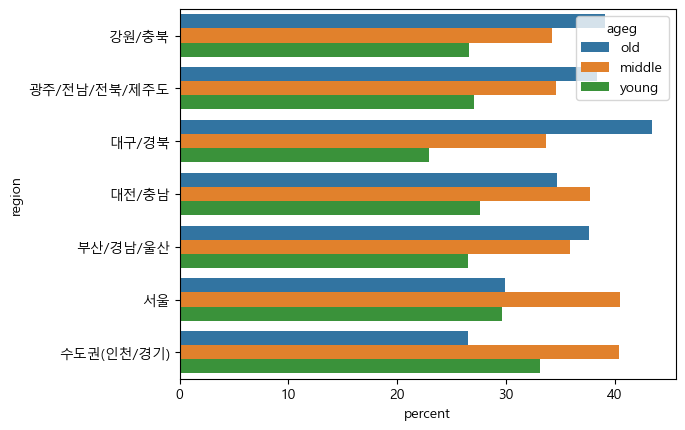

In [330]:
# 그래프로 만들자.
sns.barplot(data=region_ageg,y="region",x='percent',hue='ageg')